# Credit Risk Evaluation of Loan Applicants Based on Artificial Neural Network (ANN) Model                      

#                                                    Group 6

# 1 Importation of Libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt

# 2 Loading of Data

In [26]:
bank_df = pd.read_csv(r"F:\EPISTEMOLOGY\Msc. COMPUTER SCIENCE\INTELLIGENT SYSTEMS\ai\Data.csv")

In [27]:
bank_df.head(20)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [28]:
bank_df.shape

(5000, 14)

- ID: Customer ID
- Age: Customer Age
- Experience: Amount of work experience in years
- Income: Amount of annual income (in thousands)
- Zipcode: Zipcode of where customer lives
- Family: Number of family members
- CCAvg: Average monthly credit card spendings
- Education: Education level (1: Bachelor, 2: Master, 3: Advanced Degree)
- Mortgage: Mortgage of house (in thousands)
- Securities Account: Boolean of whether customer has a securities account
- CD Account: Boolean of whether customer has Certificate of Deposit account
- Online: Boolean of whether customer uses online banking
- CreditCard: Does the customer use credit card issued by the bank?
- Personal Loan: This is the target variable (Binary Classification Problem)

# 3 Exploratory and Descriptive Statistics

In [29]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [30]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [31]:
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# 4 Multicollinearity Check

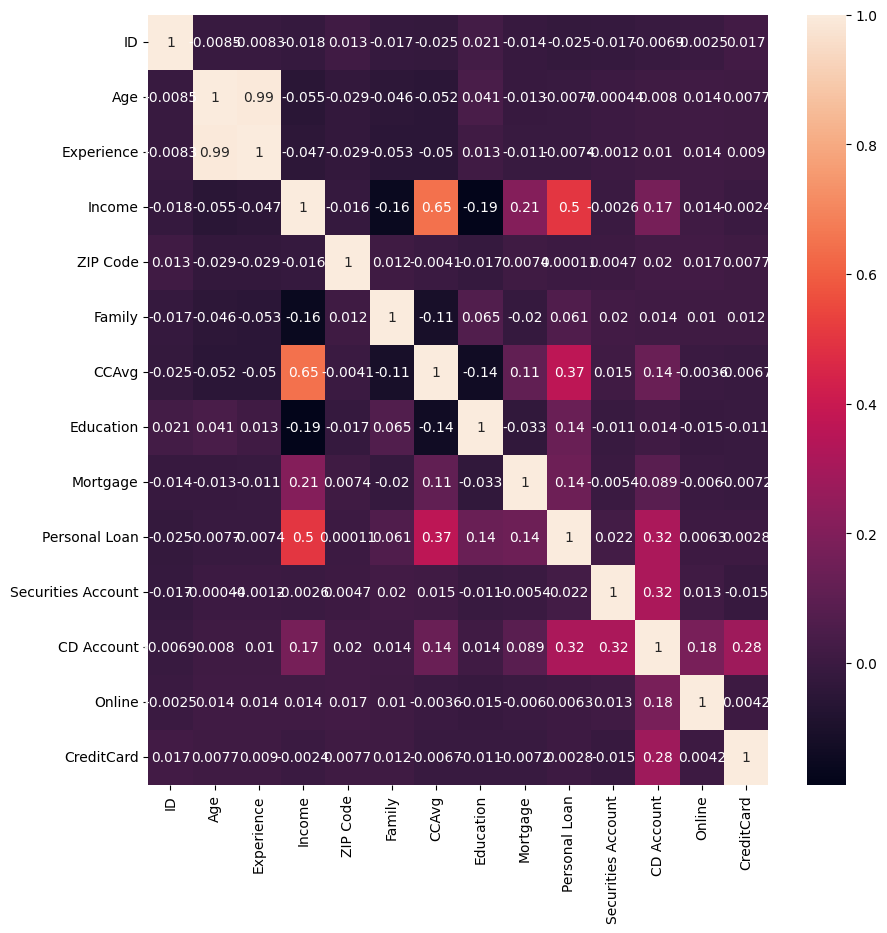

In [32]:
cm = bank_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.savefig('heatmap.png', facecolor='w', bbox_inches='tight')
plt.show()

## 5 Data Preparation and Spliting

In [33]:
from tensorflow.keras.utils import to_categorical

X = bank_df.drop(columns=["Personal Loan"])
y = bank_df["Personal Loan"]

y = to_categorical(y)

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4500, 13), (500, 13), (4500, 2), (500, 2))

## 6 Building a Multi-Layer Neaural Network Model

In [35]:
# ann_model is an instance of a neural network model, such as a Sequential model in libraries like TensorFlow or Keras.
# add(): It is a method used to add layers to the neural network model. In this case, it adds a Dense layer to the model.
# Dense: Dense is a type of layer that connects every neuron in the previous layer to every neuron in the current layer. 
# It is a fully connected layer.
        # 250: It represents the number of neurons or units in the Dense layer. This parameter determines the dimensionality or size of the output space of the layer.
        # In this case, the Dense layer will have 250 neurons.
# input_dim: It specifies the dimensionality of the input to the layer.
        # In this case, input_dim=13 indicates that the input to the Dense layer is a vector of size 13. 
        # This corresponds to the number of features or inputs expected by the model.
# kernel_initializer: It specifies the method used to initialize the weights of the layer. 
    #In this case, kernel_initializer='normal' indicates that the weights will be initialized using a normal distribution.
# activation: It specifies the activation function applied to the output of the layer. 
        #In this case, activation='relu' indicates that the rectified linear unit (ReLU) activation function will be used.
        #ReLU is a popular activation function that introduces non-linearity and helps the model learn complex patterns in the data.
        # The rectified linear activation function (ReLU) for short is a piecewise linear function that will
        # output the input directly if it is positive, otherwise, it will output zero
        # The rectified linear activation is the default activation when developing multilayer Perceptron and convolutional neural networks.
        # The sigmoid and hyperbolic tangent activation functions cannot be used in networks with many layers due to the vanishing gradient problem.
        # The rectified linear activation function overcomes the vanishing gradient problem, allowing models to learn faster and perform better.

#3Overall, the code snippet adds a Dense layer with 250 neurons, expecting an input vector of size 13. 
#The layer uses a normal distribution for weight initialization and applies the ReLU activation function to its output. 
#This layer will be part of the neural network model and contribute to the model's overall architecture and functionality.

#Dropout: Dropout is a regularization technique commonly used in neural networks to prevent overfitting. 
        #It randomly sets a fraction of input units to 0 at each update during training time, to prevent the model from relying too heavily on specific input features.
        #0.3: It represents the dropout rate, which is the fraction of the input units that will be set to 0 during training. 
        #In this case, 0.3 indicates that 30% of the input units will be randomly dropped or set to 0 during each update during training.

#By adding a Dense layer with 500 neurons and using the ReLU activation function, you are increasing the complexity and capacity of your neural network model. 
        #The layer will take the input from the previous layer (or input layer) and apply matrix multiplication with its weight parameters, followed by the ReLU activation function to introduce non-linearity to the output. 
        #The output of this layer will then serve as the input to the subsequent layer in the model.
        # Increasing the number of neurons in a Dense layer can potentially improve the model's ability to learn intricate patterns and capture more complex relationships in the data.
        # However, it also increases the number of parameters in the model, which may require more computational resources and can make the model more prone to overfitting if not appropriately regularized.

# The softmax function takes the outputs of the Dense layer and normalizes them to represent a probability distribution over the classes. 
        #It ensures that the sum of the probabilities for all classes is equal to 1.
        #Each neuron in the output layer represents the probability of the corresponding class, and the class with the highest probability is chosen as the predicted class.

In [36]:
# A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
ann_model = keras.Sequential()

# adding dense layer  dense layer is deeply connected layer from its preceding layer which works for changing the 
# dimension of the output by performing matrix vector multiplication
ann_model.add(Dense(250, input_dim=13, kernel_initializer='normal', activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.4))
ann_model.add(Dense(250, activation='linear'))
ann_model.add(Dropout(0.4))

# adding dense layer with softmax activation/output layer
ann_model.add(Dense(2, activation='softmax'))
ann_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 250)               3500      
                                                                 
 dropout_5 (Dropout)         (None, 250)               0         
                                                                 
 dense_7 (Dense)             (None, 500)               125500    
                                                                 
 dropout_6 (Dropout)         (None, 500)               0         
                                                                 
 dense_8 (Dense)             (None, 500)               250500    
                                                                 
 dropout_7 (Dropout)         (None, 500)               0         
                                                                 
 dense_9 (Dense)             (None, 500)              

In [37]:
#Understanding the number of trainable and non-trainable parameters in a model can provide insights into its complexity, memory requirements, and the potential for overfitting. 
#It's essential to strike a balance between model complexity (number of parameters) and the amount of available training data to avoid overfitting or underfitting the model.
#Total params: This refers to the total number of parameters in your model, which includes all the trainable parameters (weights and biases) across all layers.
#In this case, the total number of parameters is 755,752.
#(2.88 MB): This provides the size of the total parameters in terms of memory storage.
#It indicates that the total parameters of the model occupy approximately 2.88 megabytes of memory.

#Trainable params: This represents the number of parameters that will be updated during the training process.
#It includes the weights and biases of the model's layers that will be adjusted to minimize the loss function. 

#on-trainable params: This refers to the number of parameters in the model that are not trainable.

## 7 Compilation and Training of Deep Learning Model

In [38]:
# custom functions for f1, precision and recall

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [39]:
ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[f1_m]) # metrics=['accuracy']

In [40]:
# The fit() function - used in TensorFlow or Keras, to train a model
# X_train and y_train: training data inputs and corresponding target outputs, respectively. 
# epochs: number times the model pass through the entire training dataset. 
# In this case, the model will go through the training data X_train and y_train 10 times during the training process. 
# Each epoch allows the model to update its internal parameters and learn from the data.
# validation_split: proportion of the training data that will be used for validation. 
# In this case, 0.2 - 20% of the training data for validation, remaining 80% for training the model.
# verbose: verbosity of the training process. It determines the amount of information that will be displayed during training. 
# In this case, verbose=1 means that training progress and performance metrics will be displayed for each epoch.

In [41]:
history = ann_model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
113/113 [==============================] - 6s 20ms/step - loss: 0.1938 - f1_m: 0.9356 - val_loss: 0.0747 - val_f1_m: 0.9752
Epoch 2/10
113/113 [==============================] - 2s 15ms/step - loss: 0.0978 - f1_m: 0.9652 - val_loss: 0.0758 - val_f1_m: 0.9720
Epoch 3/10
113/113 [==============================] - 2s 15ms/step - loss: 0.0847 - f1_m: 0.9693 - val_loss: 0.0913 - val_f1_m: 0.9698
Epoch 4/10
113/113 [==============================] - 2s 15ms/step - loss: 0.0770 - f1_m: 0.9743 - val_loss: 0.0621 - val_f1_m: 0.9774
Epoch 5/10
113/113 [==============================] - 2s 16ms/step - loss: 0.0764 - f1_m: 0.9735 - val_loss: 0.0742 - val_f1_m: 0.9709
Epoch 6/10
113/113 [==============================] - 2s 16ms/step - loss: 0.0674 - f1_m: 0.9759 - val_loss: 0.0664 - val_f1_m: 0.9720
Epoch 7/10
113/113 [==============================] - 2s 15ms/step - loss: 0.0629 - f1_m: 0.9804 - val_loss: 0.0593 - val_f1_m: 0.9741
Epoch 8/10
113/113 [==============================] - 2

In [42]:
# Plot the model performance across epochs
#3plt.figure(figsize=(10,8))
#3plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('Model Loss')
#plt.ylabel('loss')
#plt.legend(['train_loss','val_loss'], loc = 'upper right')
#plt.savefig('modelloss.png', facecolor='w', bbox_inches='tight')
#plt.show()

## 8 Performance Evaluation of ANN Model

In [43]:
predictions = ann_model.predict(X_test)
predict = []

for i in predictions:
    predict.append(np.argmax(i))

16/16 [==============================] - 0s 4ms/step


In [44]:
from sklearn import metrics
y_test = np.argmax(y_test, axis=1)

f1_test = metrics.f1_score(y_test, predict)        # F1 = 2 * (precision * recall) / (precision + recall)
prec = metrics.precision_score(y_test, predict)    # Precision = true positives / (true positives + false positives)
rec = metrics.recall_score(y_test, predict)        # Recall = true positives / (true positives + false negatives)
acc = metrics.accuracy_score(y_test, predict)

print ("F1 Score: {:.4f}.".format(f1_test)) 
print ("Precision: {:.4f}.".format(prec))
print ("Recall: {:.4f}.".format(rec))
print ("Accuracy: {:.4f}.".format(acc)) 
#The F1 score ranges from 0 to 1, with 1 being the best score indicating perfect precision and recall. 
# Precision is a performance metric commonly used in binary classification tasks. It measures the accuracy of positive predictions made by a model. The precision score is calculated as the ratio of true positives to the sum of true positives and false positives:
# It measures the ability of a model to correctly identify positive instances. The recall score is calculated as the ratio of true positives to the sum of true positives and false negatives:

# Accuracy is not a good measure of performance for this project as dataset is unbalanced.

F1 Score: 0.8916.
Precision: 0.9250.
Recall: 0.8605.
Accuracy: 0.9820.


In [45]:
# conf_mat = metrics.confusion_matrix(y_test, predict)
# plt.figure(figsize=(10,8))
# sns.heatmap(conf_mat, annot=True, cbar=False)
# plt.savefig('conf_matrix.png', facecolor='w', bbox_inches='tight')
# plt.show()

In [46]:
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       457
           1       0.93      0.86      0.89        43

    accuracy                           0.98       500
   macro avg       0.96      0.93      0.94       500
weighted avg       0.98      0.98      0.98       500



In [47]:
# This classification report provides a detailed assessment of the model's performance for each class, as well as overall performance metrics. 
# It helps to evaluate the model's accuracy, recall, and F1-score on a per-class basis and provides insights into how the model performs across different classes.

# precision: Precision is a measure of the accuracy of positive predictions.
        # For class 0, the precision is 0.97, indicating that 97% of the instances predicted as class 0 were correct. 
        #For class 1, the precision is 0.93, meaning that 93% of the instances predicted as class 1 were correct.

#recall: Recall, also known as sensitivity or true positive rate, measures the ability of the model to correctly identify positive instances.
        # For class 0, the recall is 0.99, indicating that 99% of the true class 0 instances were correctly identified. 
        #For class 1, the recall is 0.75, meaning that 75% of the true class 1 instances were correctly identified.

#f1-score: The F1 score is the harmonic mean of precision and recall. 
        #It provides a balanced measure that considers both precision and recall.
        #For class 0, the F1 score is 0.98, indicating a high accuracy in predicting class 0. For class 1, the F1 score is 0.83, which suggests a slightly lower accuracy in predicting class 1 compared to class 0.

#accuracy: The overall accuracy of the model is 0.97, meaning that it correctly predicted 97% of the instances in the test dataset.

# macro avg: This row represents the average metrics across all classes. 
        # The macro-average precision, recall, and F1-score are calculated by averaging the values for each class, without considering the class imbalance.
        # In this case, the macro-average precision is 0.95, the macro-average recall is 0.87, and the macro-average F1-score is 0.91.

#weighted avg: This row represents the weighted average of the metrics, taking into account the support (number of instances) for each class. 
#The weighted-average precision, recall, and F1-score are calculated by considering the class imbalance. In this case, the weighted-average precision is 0.97, the weighted-average recall is 0.97, and the weighted-average F1-score is 0.96.